Fraud Detection: Describe your fraud model detection in detail (TASK 2)

1. Importing data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score

In [2]:
#used google colab (can also use jupyter)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading data into dataframe 'data'
data = pd.read_csv('drive/MyDrive/Fraud/Fraud.csv')

In [4]:
#printing th first 5 rows (head) of dataframe
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#looking at the column names
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
#printing datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
#checking for null values
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#ensuring that no null values are present
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#looking at the no. of unique values in each column
data.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

2. EDA (Exploratory Data Analysis)

In [11]:
#checking to see how many values actually correspond to fraudulent transactions
#It is seen that a huge number if values are non-fraudulent and therefore there is a huge class imbalance for our outcome/dependent/ target variable: 'isFraud'
data.groupby('isFraud').size()

isFraud
0    6354407
1       8213
dtype: int64

In [12]:
#Now checking the same for the flagged fraud values
#It is seen that there is even a bigger class imbalance for isFlaggedFraud so much so that we can even discard this entire column as it becomes statistically insignificant
data.groupby('isFlaggedFraud').size()

isFlaggedFraud
0    6362604
1         16
dtype: int64

From above we see that Class Imbalance is Present

In [13]:
# We now store our dependent variable or outcome in a variable 'outcome'

In [14]:
outcome = 'isFraud'

In [15]:
# now we explore other variables
# checking the unique values present in the independent variable :'type'
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
#Checking the value counts for each of these unique values
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

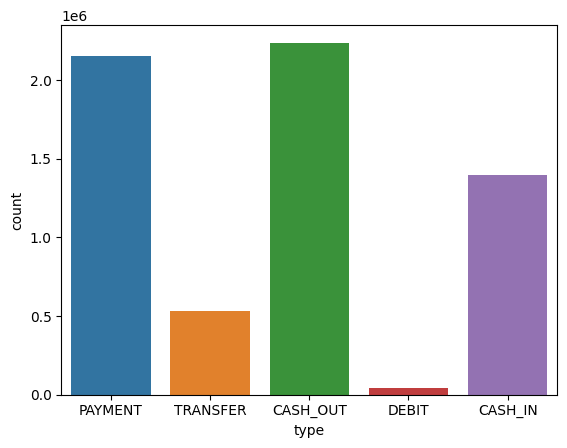

In [17]:
#plotting a countplot using seaborn for each of these unique values
sns.countplot(x='type', data=data)
plt.show()

In [18]:
# we now proceed to analyse how these values correlate with our outcome variable
# we discover that only the type of payments that are marked as 'CASH_OUT' and 'TRANSFER' may result in a fraudulent transaction
data.groupby([outcome, 'type']).size()

isFraud  type    
0        CASH_IN     1399284
         CASH_OUT    2233384
         DEBIT         41432
         PAYMENT     2151495
         TRANSFER     528812
1        CASH_OUT       4116
         TRANSFER       4097
dtype: int64

In [19]:
# we look at the oldbalanceOrg values
data['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [20]:
#now we also look at our amount variable values

data['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

Removing outliers ( using Z scores as the statistical tests) and boxplots


(TASK 1: Data cleaning including missing values, outliers and multi-collinearity. )

<Axes: >

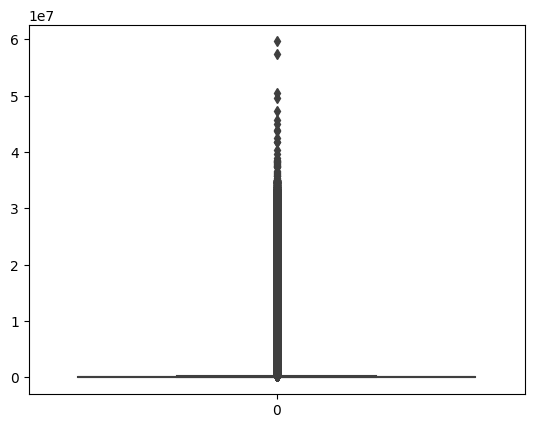

In [21]:
# for oldbalanceOrg
sns.boxplot(data['oldbalanceOrg'])

In [22]:
#Using z scores, we remove outliers for variables have zscores > 3

from scipy.stats import zscore


In [23]:
#We analyze the z score corresponding to outliers in the independent variable 'amount'
#We cannot remove so many rows from isFraud (our outcome variable) as there is already class imbalance present so we do not remove the outliers for the 'amount' variable.
data[np.abs(zscore(data['amount'])) < 3][outcome].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

In [24]:
#We analyze the z score corresponding to outliers detected in the independent variable 'oldbalanceOrg'
# we can remove these values as they are not reducing our outcome variable's 1 value by a lot of rows unlike amount
data[np.abs(zscore(data['oldbalanceOrg'])) < 3][outcome].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [25]:

data[np.abs(zscore(data['oldbalanceOrg'])) < 3].shape

(6207480, 11)

In [26]:
#Removing oldBalanceOrg outliers
data = data[np.abs(zscore(data['oldbalanceOrg'])) < 3]

In [27]:
data[outcome].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

<Axes: >

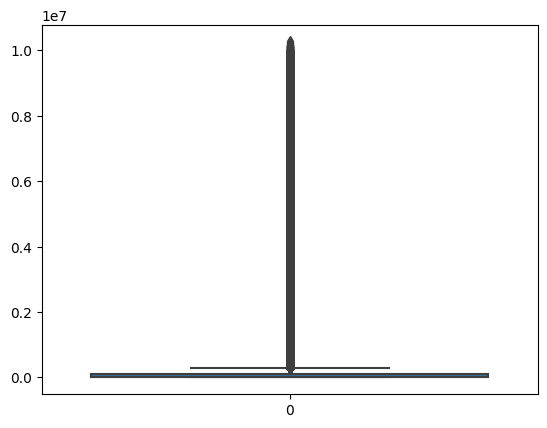

In [28]:
#Now analyzing 'newbalanceOrig'
sns.boxplot(data['newbalanceOrig'])

In [29]:
#checking for outliers corresponding to newbalanceOrig
#we can remove these outliers as they do not affect our outcome's lower class imbalance value (1) by a lot
data[np.abs(zscore(data['newbalanceOrig'])) < 3][outcome].value_counts()


0    5969852
1       7899
Name: isFraud, dtype: int64

In [30]:
#Removing these outliers
data = data[np.abs(zscore(data['newbalanceOrig'])) < 3]

In [31]:
data.shape

(5977751, 11)

In [32]:
#In the given problem statement we know that the oldbalanceDest and newbalanceDest corresponding to namesDest that start with 'M' are 0
#So we first locate the values
#There is a large number of these values (Around one thirds of the entire dataset, so we cannot remove them)
data.loc[data['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [33]:
#Now we analyze the rest of the values
data.loc[~data['nameDest'].str.startswith('M')]['newbalanceDest'].describe()

count    3.826402e+06
mean     1.853100e+06
std      4.423903e+06
min      0.000000e+00
25%      2.242694e+05
50%      6.858243e+05
75%      1.908355e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

Impute the rows with 'M's in nameDest with median of the remaining rows

In [34]:
#find median
med = data[~data['nameDest'].str.startswith('M')]['oldbalanceDest'].median()
# replace the values of oldBalanceDest with the median
data.loc[data['nameDest'].str.startswith('M'), 'oldbalanceDest'] = med

In [35]:
#find median
med2 = data[~data['nameDest'].str.startswith('M')]['newbalanceDest'].median()
# replace the values of newbalanceDest with median
data.loc[data['nameDest'].str.startswith('M'), 'newbalanceDest'] = med2

In [36]:
data['isFlaggedFraud'].value_counts()

0    5977743
1          8
Name: isFlaggedFraud, dtype: int64

In [37]:
data['oldbalanceOrg'].value_counts()

0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
8232.03            1
500665.47          1
130969.88          1
270587.15          1
170136.00          1
Name: oldbalanceOrg, Length: 1461191, dtype: int64

In [38]:
data['newbalanceOrig'].value_counts()

0.00         3609402
698.06             4
3420.22            4
15515.98           4
5317.90            4
              ...   
601732.44          1
29460.17           1
280088.20          1
521801.24          1
510167.71          1
Name: newbalanceOrig, Length: 2297957, dtype: int64

In [39]:
# Now we locate other rows having thes values of these variables as 0
data.loc[data['oldbalanceOrg'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,521801.835,685824.345,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,521801.835,685824.345,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,521801.835,685824.345,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,521801.835,685824.345,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.620,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,521801.835,685824.345,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.530,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.000,0.000,1,0


In [40]:
data.loc[data['newbalanceOrig'] == 0.0, :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.000,0.000,1,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.0,M1176932104,521801.835,685824.345,0,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.0,C997608398,10845.000,157982.120,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.0,M801569151,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.840,6379898.110,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.000,0.000,1,0


In [41]:
# We discover that a lot of these values correspond to nameDest starting with the letter 'c'
# MULTI-COLLINEARITY
data.loc[(data['oldbalanceOrg'] == 0) & (data['nameOrig'].str.startswith('C')), :]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,521801.835,685824.345,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,521801.835,685824.345,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,521801.835,685824.345,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,521801.835,685824.345,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,521801.835,685824.345,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.620,730278.740,0,0
6356244,709,PAYMENT,14499.40,C1009494758,0.0,0.0,M840318507,521801.835,685824.345,0,0
6362461,730,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.530,1008609.530,1,0
6362463,730,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.000,0.000,1,0


In [42]:
data.loc[data['oldbalanceOrg'] == 0, :].groupby(['type']).size()

type
CASH_IN       13464
CASH_OUT    1025799
DEBIT          6158
PAYMENT      774245
TRANSFER     282783
dtype: int64

In [43]:
data.loc[data['newbalanceOrig'] == 0, :].groupby(['type']).size()

type
CASH_OUT    1985058
DEBIT         11786
PAYMENT     1101124
TRANSFER     511434
dtype: int64

In [44]:
data.loc[(data['oldbalanceOrg'] == 0) & (data['nameOrig'].str.startswith('C')), :].groupby([outcome, 'type']).size()

isFraud  type    
0        CASH_IN       13464
         CASH_OUT    1025762
         DEBIT          6158
         PAYMENT      774245
         TRANSFER     282779
1        CASH_OUT         37
         TRANSFER          4
dtype: int64

In [45]:
data['nameOrig'].str.startswith('C').value_counts()

True    5977751
Name: nameOrig, dtype: int64

In [46]:
data[data['nameDest'].str.startswith('C') & data[outcome] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [47]:
data[outcome].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

3. Creating a separate column for the nameDest values that start with C

In [48]:
data['nameDest_startswith_C'] = data['nameDest'].str.startswith('C')

In [49]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0,False


In [50]:
data['nameDest_startswith_C'].value_counts()

True     3826402
False    2151349
Name: nameDest_startswith_C, dtype: int64

4. Encoding data for fitting into models

In [51]:
from sklearn.preprocessing import OrdinalEncoder
data[['nameDest_startswith_C']] = OrdinalEncoder(categories=[[False, True]]).fit_transform(data[['nameDest_startswith_C']])

In [52]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [53]:
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0,0.0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0,0.0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.000,1,0,1.0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.000,1,0,1.0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0,0.0,0,0,1,0


In [54]:
data.groupby([outcome, 'type_CASH_OUT']).size()

isFraud  type_CASH_OUT
0        0                3736516
         1                2233336
1        0                   3936
         1                   3963
dtype: int64

In [56]:
data.groupby([outcome, 'type_DEBIT']).size()

isFraud  type_DEBIT
0        0             5928420
         1               41432
1        0                7899
dtype: int64

In [57]:
data.groupby([outcome, 'type_PAYMENT']).size()

isFraud  type_PAYMENT
0        0               3818503
         1               2151349
1        0                  7899
dtype: int64

5. Removing columns 'type_DEBIT', 'type_PAYMENT' as they only contain value 0 for isFraud (outcome) (TASK 3: How did you select variables to be included in the model?)

In [58]:
data = data.drop(['type_DEBIT', 'type_PAYMENT'], axis=1)

In [59]:
data.shape

(5977751, 13)

6. Examining the correlation among different variables using a heatmap
( TASK 2 CHECKING MULTICOLLINEARITY AGAIN)

<ipython-input-60-c64484b5c189>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)


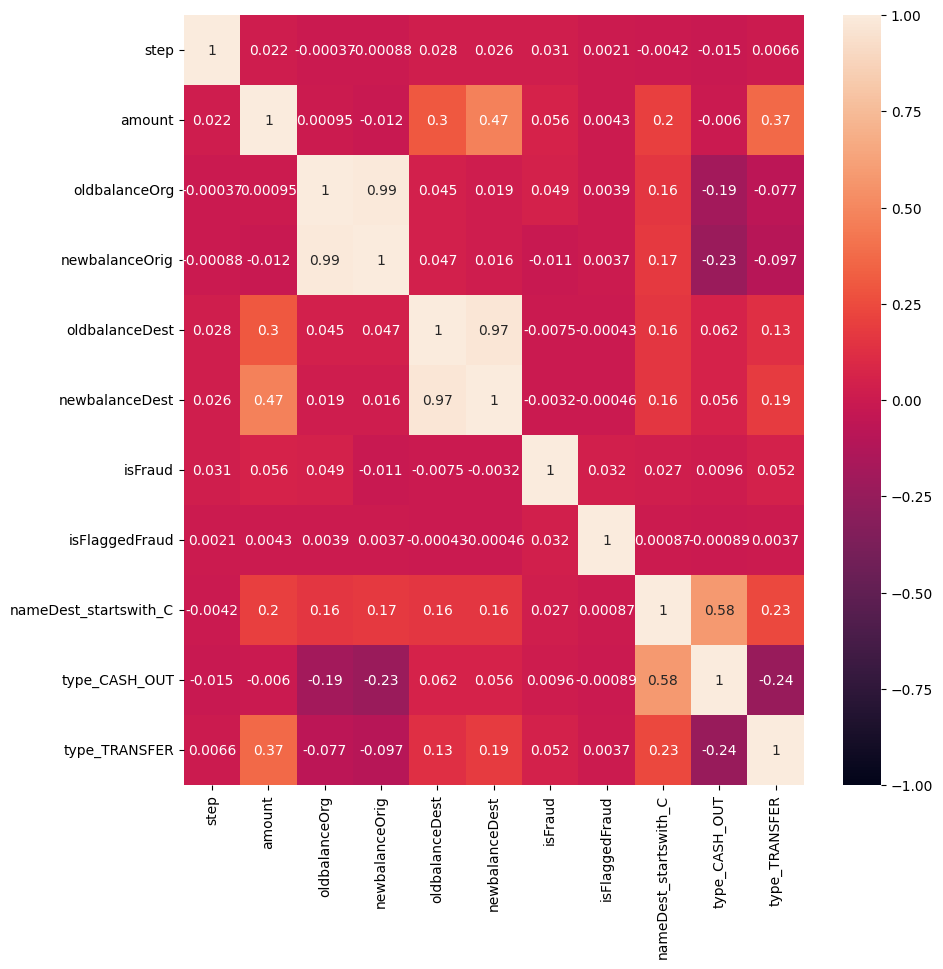

In [60]:
plt.figure(figsize=[10, 10])

sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

7. Splitting the training and testing data

In [61]:
from sklearn.model_selection import train_test_split

X = data.drop([outcome], axis=1)
y = data[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=403)
X_train.reset_index(drop=True, inplace=True)

print('Original dataset ({}, {})'.format(data.shape[0], data.shape[1]))
print('Training set ({}, {})'.format(X_train.shape[0], X_train.shape[1]))
print('Testing set ({}, {})'.format(X_test.shape[0], X_test.shape[1]))

Original dataset (5977751, 13)
Training set (5738640, 12)
Testing set (239111, 12)


In [62]:
X_train.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,326,135133.31,C61320343,0.00,0.00,C1963516031,8712517.100,8847650.400,0,1.0,1,0
1,331,73347.99,C2061757673,3192660.12,3266008.12,C1569772715,2225085.510,2151737.510,0,1.0,0,0
2,158,23640.83,C414221900,76488.49,52847.66,M643441925,521801.835,685824.345,0,0.0,0,0
3,297,145320.16,C902269039,0.00,0.00,C973929404,865019.170,1010339.330,0,1.0,1,0
4,303,8090.13,C1325671735,0.00,0.00,M1391903739,521801.835,685824.345,0,0.0,0,0


8. Performing standardization

Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.fit_transform(X_train.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_train_std = pd.DataFrame(X_train, columns=X_train.columns)




In [64]:
display(X_train_std.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06
mean,6.925843e-17,3.813696e-16,-1.385590e-16,1.537092e-16,-6.215132e-17,1.333945e-16,1.394059e-06,6.401287e-01,3.742648e-01,8.911049e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.180702e-03,4.799625e-01,4.839325e-01,2.849032e-01
min,-1.702369e+00,-2.917342e-01,-3.154311e-01,-3.184930e-01,-3.733167e-01,-3.997586e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.146289e-01,-2.716150e-01,-3.154311e-01,-3.184930e-01,-2.795209e-01,-2.772117e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-3.216194e-02,-1.811341e-01,-2.994084e-01,-3.184930e-01,-2.152810e-01,-2.084228e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.415348e-01,4.221309e-02,-2.095451e-01,-2.037726e-01,-1.138998e-01,-1.049979e-01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,3.504746e+00,1.492141e+02,1.358705e+01,6.564968e+00,1.074516e+02,9.896949e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [67]:

X_test[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.transform(X_test.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_test_std = pd.DataFrame(X_test, columns=X_train.columns)


In [68]:
display(X_test_std.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
count,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.0,239111.000000,239111.000000,239111.000000
mean,-0.000336,0.001319,0.002864,0.001783,-0.000054,0.000773,0.0,0.639594,0.374420,0.089318
std,1.000297,0.990763,1.005075,1.003349,0.993335,0.993596,0.0,0.480119,0.483974,0.285203
min,-1.702369,-0.291734,-0.315431,-0.318493,-0.373317,-0.399759,0.0,0.000000,0.000000,0.000000
25%,-0.621647,-0.271495,-0.315431,-0.318493,-0.278375,-0.276643,0.0,0.000000,0.000000,0.000000
50%,-0.032162,-0.180879,-0.299458,-0.318493,-0.215281,-0.208423,0.0,1.000000,0.000000,0.000000
75%,0.641535,0.041696,-0.209239,-0.204023,-0.111134,-0.101503,0.0,1.000000,1.000000,0.000000
max,3.504746,90.685626,13.587048,6.564851,91.175447,83.944307,0.0,1.000000,1.000000,1.000000


9. Model Training (Using Random Forest)

In [69]:
#MODEL TRAINING
#USING RANDOM FOREST

In [70]:
y_train_ = y_train.values
y_test_ = y_test.values

In [71]:
# computing the class weight
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced', classes=[0, 1], y = y_train_)

array([  0.50066157, 378.38850059])

In [72]:
X_train_std.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
0,0.578376,-0.073192,C61320343,-0.315431,-0.318493,C1963516031,2.265404,2.068617,1.0,1,0
1,0.613464,-0.173114,C2061757673,4.372527,4.254498,C1569772715,0.300585,0.200547,1.0,0,0
2,-0.600594,-0.253501,C414221900,-0.203119,-0.244497,M643441925,-0.215281,-0.208423,0.0,0,0
3,0.374863,-0.056718,C902269039,-0.315431,-0.318493,C973929404,-0.111332,-0.117887,1.0,1,0
4,0.416969,-0.278651,C1325671735,-0.315431,-0.318493,M1391903739,-0.215281,-0.208423,0.0,0,0


In [79]:
X_test_std.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,nameDest_startswith_C,type_CASH_OUT,type_TRANSFER
5553832,0.978383,-0.288623,0.174562,0.146055,-0.215281,-0.208423,0,0.0,0,0
2100012,-0.432169,0.037277,0.291039,0.544672,-0.339706,-0.399759,0,1.0,0,0
3238130,0.045032,-0.225311,-0.315431,-0.318493,-0.255168,-0.279467,0,1.0,1,0
6041580,1.729274,-0.279762,-0.063909,-0.089015,-0.215281,-0.208423,0,0.0,0,0
3312533,0.059068,0.332396,-0.303648,-0.318493,-0.321134,-0.244022,0,1.0,1,0


In [80]:
X_test_std = X_test_std.drop(['isFlaggedFraud'], axis=1)

(TASK 3: How did you select the variables to be included in the model?)

In [73]:
# dropping the columns nameOrig and nameDest from training and testing data as they are irrevelant in predicting the outcome
X_train_std = X_train_std.drop(['nameOrig', 'nameDest'], axis=1)
X_test_std = X_test_std.drop(['nameOrig', 'nameDest'], axis=1)

In [76]:
# training the Random Forest Model
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, class_weight='balanced', n_jobs=-1)
RF.fit(X_train_std, y_train_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=3, n_jobs=-1)

10. Classification Report for the model (TASK 4: Demonstrate the performance of the model by using best set of tools)

In [81]:
from sklearn.metrics import f1_score, classification_report
pred1 = RF.predict(X_train_std)
pred2 = RF.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

0.9877556337110851
0.8959731543624161
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731057
           1       0.98      1.00      0.99      7583

    accuracy                           1.00   5738640
   macro avg       0.99      1.00      0.99   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238795
           1       0.95      0.84      0.90       316

    accuracy                           1.00    239111
   macro avg       0.98      0.92      0.95    239111
weighted avg       1.00      1.00      1.00    239111



TASK 5: What are the key factors that predict fraudulent customer?:

 From above we can see that only transactions marked as of type 'CASH_OUT' and 'TRANSFER' can be fraudulent. In addition, the nameDest that starts with C is unusually linked to a fraudulent transaction. We have dropped the isFlaggedFraud variable in our analysis due to its values being highly skewed towards zero and only 16 values being 1. Howvever it is stil useful as the isFlaggedFraud values contain transactions wherein large amount of money is being transferred. So, if a transaction exceeds a certain amount, the transaction can be revoked due to the high chance of it being indicative of fraud.

TASK 6: Do these factors make sense? If yes, How? If not, How not?

Yes, the factors make sense. isFlaggedFraud, although has only 16 values and was disregarded in the final dataset indicates that transactions corresponding to large amounts of money being transferred are likely to be fraudulent.

Aprat from this, the type of payments done via **'CASH_OUT'** and **'TRANSFER'** corresponding to 1 values of isFraud also makes sense as the isFraud variable description itself mentions that fraudulent transactions for this specific dataset are due to the fraudulent behavior of the agents aiming to profit by taking control of customers accounts and trying to empty the funds by **transferring** to another account and then **cashing out** of the system.

The nameDest values starting with 'C' also do make sense to an extent, as the 'C' denotes customer and as mentioned earler, the fraudulent agents take control of customer's accounts.


TASK 7: What kind of prevention should be adopted while company update its infrastructure?

The company should implement security measures for the customer's accounts. They should identify the vulnerable customers, alert if they display any unusual transaction behaviour deviating from their normal patterns. They should implement 2FA and be wary of security breaches on their database. They should also implement a transaction amount limit at a time.

TASK 8: Assuming these actions have been implemented, how would you determine if they work?

Assuming these actions have been implemented, we can determine if they work by collecting new data and analyzing it to see the changes. If they changes show a drastic improvement in the values of isFraud from this data then we can determine that the work. In the case that we need to determine the values of isFraud itself for the new data, we can use this Machine Learning model to predict if a particular transaction isFraud or not. If the model predictions turn out to be less likely to be fraud on the data, then our prevention measures are implemented correctly.